In [10]:
import numpy as np
import math
import sympy
from scipy.fft import fft, ifft
from scipy.linalg import circulant
import matplotlib.pyplot as plt

In [4]:
# util
def cconv(x,h):    # considera que |h|<=|x|
    hpad = np.zeros(len(x))
    hpad[:len(h)] = h
    return np.real(ifft(fft(x)*fft(hpad)))

def generateBaseConjugada(N=4): 
    t = np.arange(0,N,1)
    k = np.arange(0,N,1).reshape((N,1))
    result = np.exp(-1j*2*math.pi*k*t/N)
    return result


### Exercício 5.4. 
**Considere a análise do conteúdo de frequência local de um sinal $x \in \mathbb{R}^N$ realizada tomando-se segmentos janelados de tamanho $M$ da forma $\tilde{x} = (x_m, x_{m+1}, ... , x_{m+M−1})$, para algum $m$, e calculando-se uma DFT M-dimensional de $\tilde{x}$.**

**a.** Examine o caso extremo onde $M = 1$. Em particular, compute a DFT de $\tilde{x}$. Explique por que $M = 1$ oferece perfeita localização no tempo, mas essencialmente nenhuma informação de frequência além da componente dc local.




**Resposta:**

Quando M=1
a DFT de $\tilde{x}$ terá apenas dimensão 1. O coeficente $\tilde{X}_0$ trará apenas a informação relacionada a primeira forma de onda básica, a que representa a componente DC.

$DFT(\tilde{x})=\tilde{X}$

$\tilde{X}_k = \sum_{n=0}^{N-1} \tilde{x}_n * e^{-i*2*\pi*k*n/N}$


$\tilde{X}_0 = \tilde{x}_0 * e^{-i*2*\pi*0*0/N} = \tilde{x}_0 * 1$


Com M=1, será posível realizar N janelamentos, um janelamento para cada amostra, em outras palavras esse o caso onde se obtém a máxima resolução temporal (ou perfeita localização no tempo).

Ao computarmos N DFTs, associadas às N janelas com largura M=1, estaremos basicamente fazendo uma cópia do sinal original.



In [5]:
generateBaseConjugada(1)

array([[1.+0.j]])

In [7]:
k=0
n = 0
N = 1
X0 = np.exp(-1j*2*math.pi*k*n/N)
X0

(1+0j)

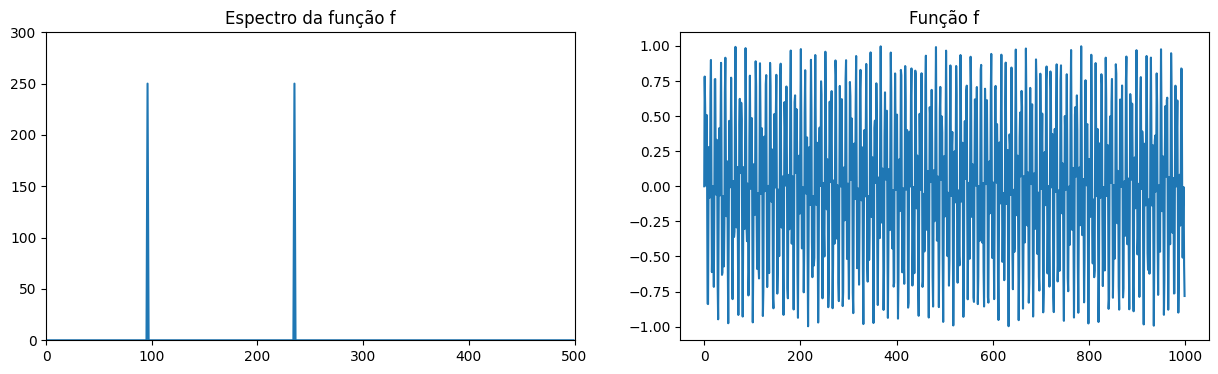

In [15]:
def build_signal(N = 1000):
    t = np.linspace(0, 1, N, endpoint=False) # melhor assim
    f = 0.5*np.sin(2*math.pi*96*t)+0.5*np.sin(2*math.pi*235*t)
    return f

def plot_signal(signal):
    N = len(signal)
    fig, axes = plt.subplots(1,2, figsize=(15,4));
    axes[0].set_title('Espectro da função f');
    axes[0].plot( range(N//2) , abs(fft(signal)[0:N//2]) )
    axes[0].axis([0, 500, 0, 300]);

    axes[1].set_title('Função f');
    axes[1].plot(signal)

    plt.show()
    
signal = build_signal()
plot_signal(signal)

In [35]:
def spectogram_M1(x):
    N = len(x)
    
    result = np.zeros(N, dtype='complex')
    
    for col in range(N):
        result[col] = fft(x[col:col+1])
    return result

    
result = spectogram_M1(signal)

assert np.allclose(signal, result), 'Erro'
print('São iguais')

São iguais


**b.** Examine o caso extremo $M = N$ (com $m = 0$). Em particular, compute a DFT de $\tilde{x}$. Explique por que $M = N$ não oferece nenhuma localização no tempo, mas oferece informação em frequência sem qualquer tipo de distorção.

**Resposta:**

Quando $M=N$ (com $m=0$) cairemos no caso da DFT tradicional, não janelada. A $DFT(\tilde{x})$ terá dimensão $N$ e será capaz de detectar a presença de frequências no intervalo $ [-N/2 a N/2) $. Porém, devido a característica da não-localidade dessa transformada, nenhuma informação sobre o momento de ativação ou desativação das frequências será fornecido.
